# Name :  Vaidehi Santosh Pawar

# Task 4: Email spam detection with Machine learning

In [237]:
import numpy as np
import pandas as pd
import warnings

In [238]:
warnings.filterwarnings("ignore")

In [239]:
df = pd.read_csv('./dataset/spam.csv',encoding='latin-1')

In [240]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3382,ham,K... Must book a not huh? so going for yoga ba...,NaN,NaN,NaN
5423,ham,"Sorry, I'll call later",NaN,NaN,NaN
1466,ham,Your account has been refilled successfully by...,NaN,NaN,NaN
809,ham,Ugh I don't wanna get out of bed. It's so warm.,NaN,NaN,NaN
2120,ham,"Argh my 3g is spotty, anyway the only thing I ...",NaN,NaN,NaN


In [241]:
df.shape

(5572, 5)

In [242]:
#1. Data Cleaning
#2. EDA 
#3. Text Preprocessing
#4. Model building
#5. Evalution

# 1. Data Cleaning

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [244]:
# drop last 3 cols
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [245]:
df.sample(5)

,v1,v2
798,ham,Ok i msg u b4 i leave my house.
1873,spam,You have WON a guaranteed å£1000 cash or a å£2...
2523,ham,"Sorry, I'll call later"
69,ham,I plane to give on this month end.
3061,ham,Fine. Do you remember me.


In [246]:
 # renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [247]:
df.sample(5)

,target,text
3829,ham,I agree. So i can stop thinkin about ipad. Can...
974,ham,Eh u send wrongly lar...
380,ham,I guess that's why you re worried. You must kn...
3831,ham,Ok.
4497,spam,Latest Nokia Mobile or iPOD MP3 Player +å£400 ...


In [248]:
from sklearn.preprocessing import LabelEncoder

In [249]:
encoder = LabelEncoder()

In [250]:
df['target'] = encoder.fit_transform(df['target'])

In [251]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [252]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [253]:
# check for duplicated values
df.duplicated().sum()

403

In [254]:
# remove duplicates
df = df.drop_duplicates(keep='first')

# EDA

In [255]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [256]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [257]:
import matplotlib.pyplot as plt

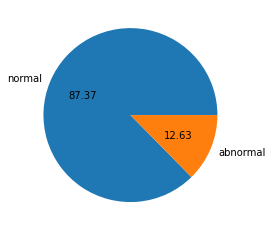

In [258]:
plt.pie(df['target'].value_counts(), labels= ['normal','abnormal'], autopct='%0.2f')
plt.show()

In [259]:
import nltk

In [260]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [261]:
df['num_characters'] = df['text'].apply(len)

In [262]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [263]:
# num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [264]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [265]:
df['text'].apply(lambda x: nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [266]:
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [267]:
df.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [268]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [269]:
df[df['target']== 0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [270]:
df[df['target']== 1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [271]:
import seaborn as sns

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

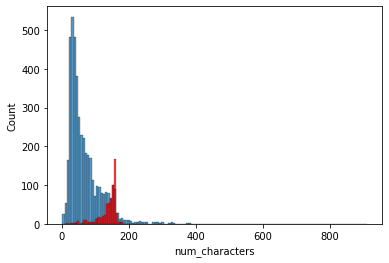

In [272]:
sns.histplot(df[df['target'] ==0]['num_characters'])
sns.histplot(df[df['target'] ==1]['num_characters'],color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

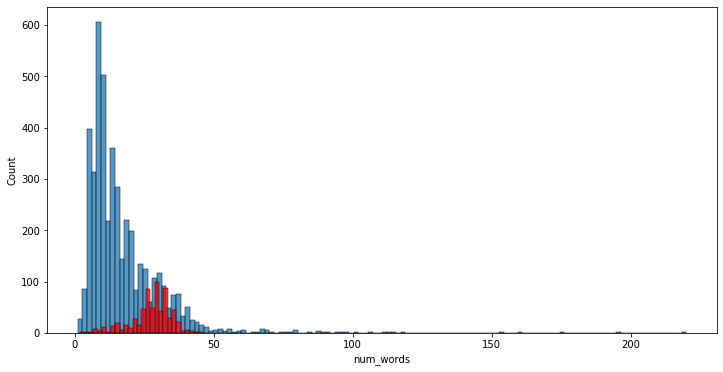

In [273]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

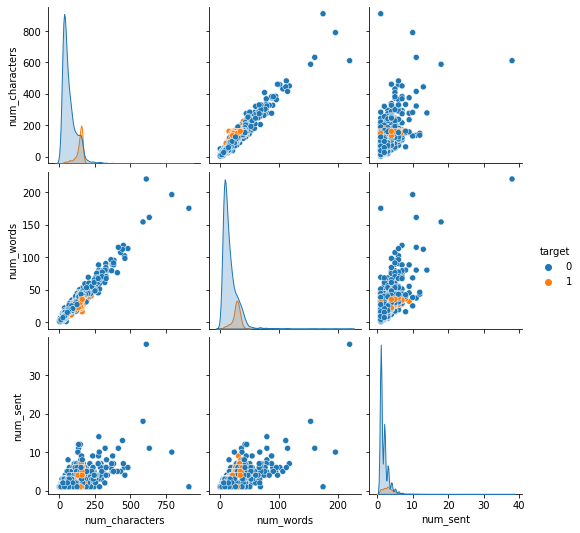

In [274]:
sns.pairplot(df,hue='target')

<AxesSubplot: >

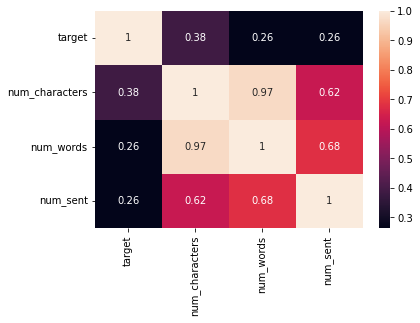

In [275]:
sns.heatmap(df.corr(),annot=True)

# Data preprocessing

In [276]:
from nltk.tokenize import  word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import re

In [277]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english')and i in re.sub(r'[^\w\s]', '', i):
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [278]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat")


'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [279]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [280]:
df['transformed_text'] = df['text'].apply(transform_text)

In [281]:
df.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [282]:
from wordcloud import WordCloud
wc = WordCloud(width= 500 , height = 500, min_font_size = 10, background_color = 'white')

In [283]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

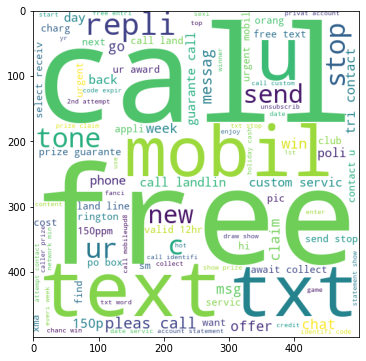

In [284]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

# Model Building

In [285]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [286]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [287]:
y = df['target'].values

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state = 2)

In [290]:
from sklearn.naive_bayes import BernoulliNB

In [291]:
bnb =  BernoulliNB()

In [292]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [293]:
y_pred =  bnb.predict(X_test)

In [294]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,plot_confusion_matrix 

In [295]:
print(accuracy_score(y_test,y_pred))

0.9700193423597679


In [296]:
print(confusion_matrix(y_test,y_pred))

[[893   3]
 [ 28 110]]


In [297]:
print(precision_score(y_test,y_pred))

0.9734513274336283


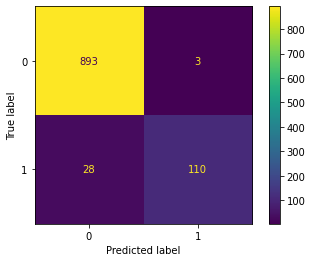

In [298]:
plot_confusion_matrix(bnb,X_test,y_test)